In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('C:/Users/bhatt/OneDrive/Desktop/whisper-main/Assignments/Customer Data/Mall_Customers.csv')

In [3]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
lab_enc = LabelEncoder()
data['Gender'] = lab_enc.fit_transform(data['Gender'])

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [6]:
X = data[['Age', 'Annual Income (k$)']].values

In [7]:
k = 5

color = ['red', 'yellow', 'blue', 'green', 'purple']

clusters = {}
for i in range(k):
    center = np.random.randint(X.min(), 100, 2)
    points = []
    cluster = {
        'center': center,
        'point': points,
        'color': color[i]
    }
    clusters[i] = cluster

In [8]:
clusters

{0: {'center': array([49, 18]), 'point': [], 'color': 'red'},
 1: {'center': array([32, 62]), 'point': [], 'color': 'yellow'},
 2: {'center': array([40, 51]), 'point': [], 'color': 'blue'},
 3: {'center': array([32, 54]), 'point': [], 'color': 'green'},
 4: {'center': array([94, 38]), 'point': [], 'color': 'purple'}}

In [9]:
def distance(k1, p):
    return np.sqrt(np.sum((k1 - p)**2))

In [10]:
def assignment_clusters(clusters):
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i], clusters[j]['center']))
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['point'].append(X[i])

In [11]:
def updation_clusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['point'])
        if pts.shape[0] > 0:
            u = np.mean(pts, axis=0)
            clusters[i]['center'] = u
            clusters[i]['point'] = []

In [12]:
def plot_clusters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['point'])
        if pts.shape[0] > 0:
            plt.scatter(pts[:, 0], pts[:, 1], color=clusters[i]['color'])
        centroid = clusters[i]['center']
        plt.scatter(centroid[0], centroid[1], color='black', marker='^')
    plt.xlabel('Age')
    plt.ylabel('Annual Income (k$)')
    plt.show()

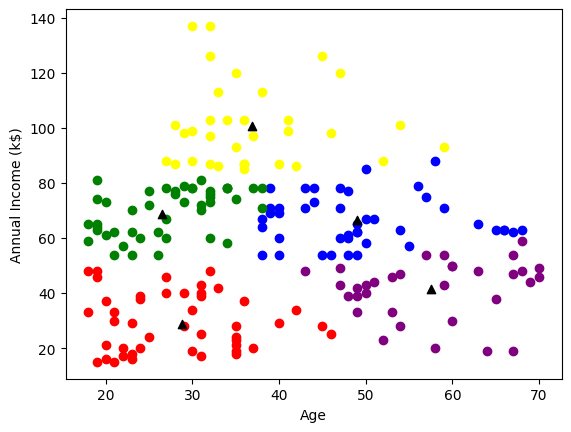

In [25]:
assignment_clusters(clusters)
plot_clusters(clusters)
updation_clusters(clusters)